In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from unifin import setRFM


In [2]:
dataset=setRFM()

El numero de filas de este dataset es de:998


# CONCLUSION

## Reporte de Recencia

In [6]:
d=dataset['R'].value_counts().to_dict()
r_frame=pd.DataFrame([d], columns=d.keys())
r_frame

,1.0,3.0,4.0,2.0,5.0
0,284,183,181,181,169


[]

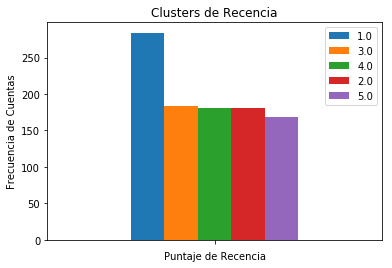

In [7]:
ax=r_frame.plot(kind='bar')
ax.set_title('Clusters de Recencia')
ax.set_xlabel('Puntaje de Recencia')
ax.set_ylabel('Frecuencia de Cuentas')
ax.set_xticklabels('')

## Reporte de Frecuencia

In [8]:
d=dataset['F'].value_counts().to_dict()
f_frame=pd.DataFrame([d], columns=d.keys())
f_frame

,5.0,4.0,1.0,3.0,2.0
0,215,210,201,186,186


[]

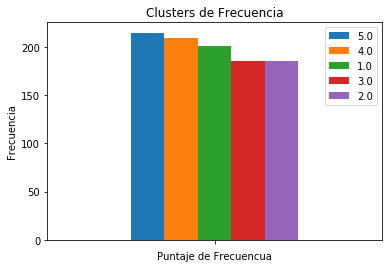

In [9]:
ax=f_frame.plot(kind='bar')
ax.set_title('Clusters de Frecuencia')
ax.set_xlabel('Puntaje de Frecuencua')
ax.set_ylabel('Frecuencia')
ax.set_xticklabels('')

## Reporte de Monto

In [10]:
d=dataset['M'].value_counts().to_dict()
m_frame=pd.DataFrame([d], columns=d.keys())
m_frame

,5.0,3.0,4.0,2.0,1.0
0,213,203,199,199,184


[]

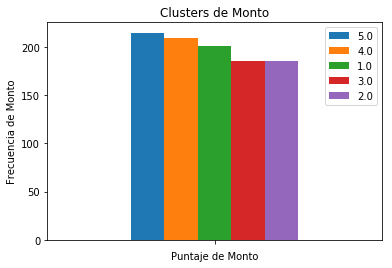

In [11]:
ax=f_frame.plot(kind='bar')
ax.set_title('Clusters de Monto')
ax.set_xlabel('Puntaje de Monto')
ax.set_ylabel('Frecuencia de Monto')
ax.set_xticklabels('')

## Reporte RFM

In [75]:
model_RFM=KMeans(n_clusters=3).fit(np.array(dataset[['R','F','M']]))
clust_RFM=pd.Series(model_RFM.labels_)
dataset['Categoria']=clust_RFM

d=dataset['Categoria'].value_counts().to_dict()
c_frame=pd.DataFrame([d], columns=d.keys())
c_frame  #375 331 292

,0,1,2
0,375,331,292


[]

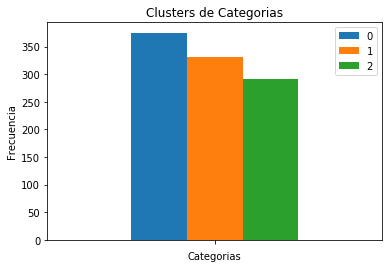

In [76]:
ax=c_frame.plot(kind='bar')
ax.set_title('Clusters de Categorias')
ax.set_xlabel('Categorias')
ax.set_ylabel('Frecuencia')
ax.set_xticklabels('')

In [41]:
dataset.head()

(998, 8)


,Id,Date,Frecuency,Money,R,F,M,Categoria
0,998,20130323,4,195.0,1.0,2.0,2.0,2
1,997,20130324,4,553.0,1.0,2.0,3.0,2
2,996,20130325,7,610.0,1.0,4.0,4.0,1
3,995,20130326,4,538.0,1.0,2.0,3.0,2
4,994,20130327,8,47.0,1.0,4.0,1.0,1


In [43]:
#plt.scatter(x=dataset['Id'],y=dataset['Categoria'],c=clust_RFM)
#plt.title('Distribuicion de Montos y Clusters')